In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# Loading the data and previewing
df = pd.read_csv('cleaned_data.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,year,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,1.0,1.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,4.0,0.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,4.0,1.0,yes,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,2.0,1.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,4.0,1.0,no,yes,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Collecting extra dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39758 entries, 0 to 39757
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39758 non-null  int64  
 1   job             39758 non-null  object 
 2   marital         39758 non-null  object 
 3   education       38206 non-null  float64
 4   default         39758 non-null  float64
 5   housing         39758 non-null  object 
 6   loan            39758 non-null  object 
 7   contact         39758 non-null  object 
 8   month           39758 non-null  object 
 9   year            39758 non-null  int64  
 10  day_of_week     39758 non-null  object 
 11  duration        39758 non-null  int64  
 12  campaign        39758 non-null  int64  
 13  pdays           39758 non-null  int64  
 14  previous        39758 non-null  int64  
 15  poutcome        39758 non-null  object 
 16  emp.var.rate    39758 non-null  float64
 17  cons.price.idx  39758 non-null 

In [4]:
# Counting NaN values in each column
nan_counts = df.isna().sum()

# Total count of NaN values in the dataset
total_nan_count = nan_counts.sum()

print(nan_counts)
print("Total NaN count:", total_nan_count)

age                  0
job                  0
marital              0
education         1552
default              0
housing              0
loan                 0
contact              0
month                0
year                 0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
Total NaN count: 1552


In [5]:
# Dropping NaN values
df.dropna(inplace=True)

In [6]:
# Subsetting x and y datasets
x = df.drop('y', axis=1)
y = df['y']

In [7]:
# One-hot encoding
x_encoded = pd.get_dummies(x, drop_first=True)  # Perform one-hot encoding

In [8]:
# Splitting train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [9]:
# Creating tree object and fitting
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

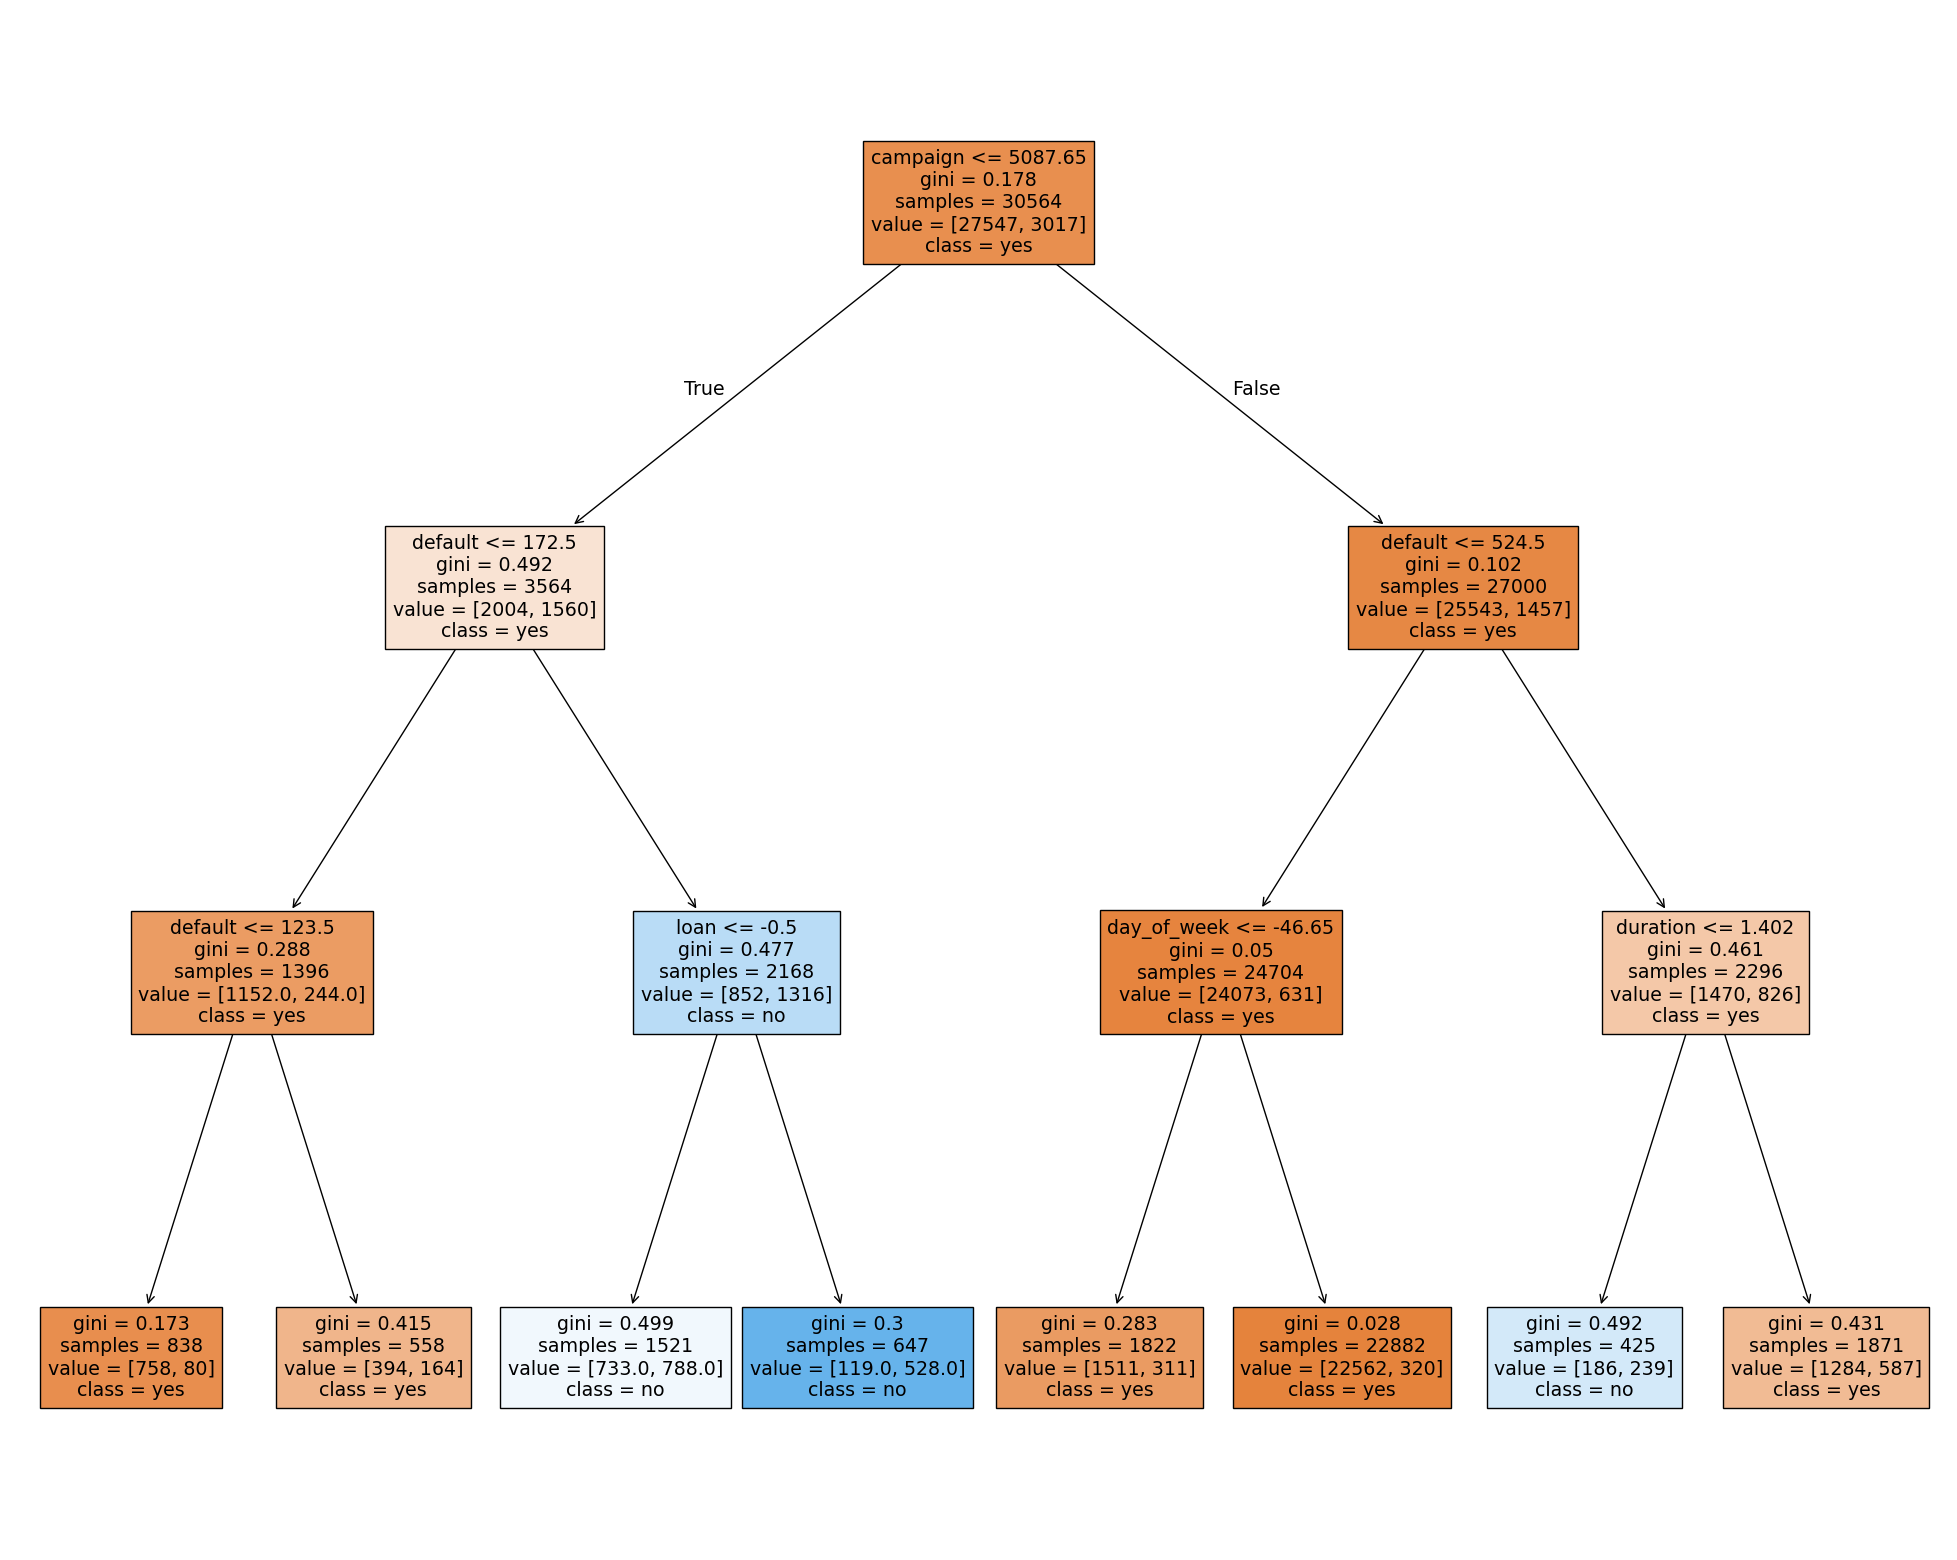

In [10]:
fig = plt.figure(figsize=(25,20))
img = tree.plot_tree(clf, feature_names=x.columns, class_names=['yes','no'], filled=True)

In [11]:
# Model prediction
y_pred = clf.predict(x_test)

In [12]:
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, pos_label='yes')
precision = metrics.precision_score(y_test, y_pred, pos_label='yes')
print("Accuracy:", accuracy)
print("F-1 Score:", f1_score)
print("Precision:", precision)

Accuracy: 0.9210939544621827
F-1 Score: 0.5762473647224174
Precision: 0.6184012066365008


In [13]:
metrics.confusion_matrix(y_test, y_pred)

array([[6629,  253],
       [ 350,  410]])